## ARMA Modeling: Forecasting

**Functions**

`tsa.SARIMAX.forecast`

### Exercise 70
Produce 1-step forecasts from your preferred model in the previous exercise, as well
as a random-walk model. 

1. Are the forecasts objectively accurate?
2. Compare these forecasts to the random walk models using MSE and MAE.

**Note**: Use 50% of the sample to estimate the model and 50% to evaluate it.

In [1]:
import pandas as pd

data = pd.read_hdf("data/term-premium.h5", "term_premium")
term = data["TERM"]

In [2]:
import statsmodels.tsa.api as tsa

nobs = term.shape[0]
half = nobs // 2
mod = tsa.SARIMAX(term.iloc[:half], order=(1, 0, 1), trend="c")
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   TERM   No. Observations:                  422
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 -70.146
Date:                Thu, 28 Sep 2023   AIC                            148.293
Time:                        13:33:14   BIC                            164.473
Sample:                    04-01-1953   HQIC                           154.686
                         - 05-01-1988                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0587      0.021      2.772      0.006       0.017       0.100
ar.L1          0.9001      0.016     56.265      0.000       0.869       0.931
ma.L1          0.4589      0.019     23.680      0.000       0.421       0.497
sigma2         0.0811      0.003     27.575      0.000       0.075       0.087
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):              1050.33
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               6.47   Skew:                             0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [3]:
mod = tsa.statespace.SARIMAX(term, order=(1, 0, 1), trend="c")
forecast_res = mod.filter(res.params)

fcast = forecast_res.predict()

errors = term - fcast
oos_errors = errors.iloc[half:]

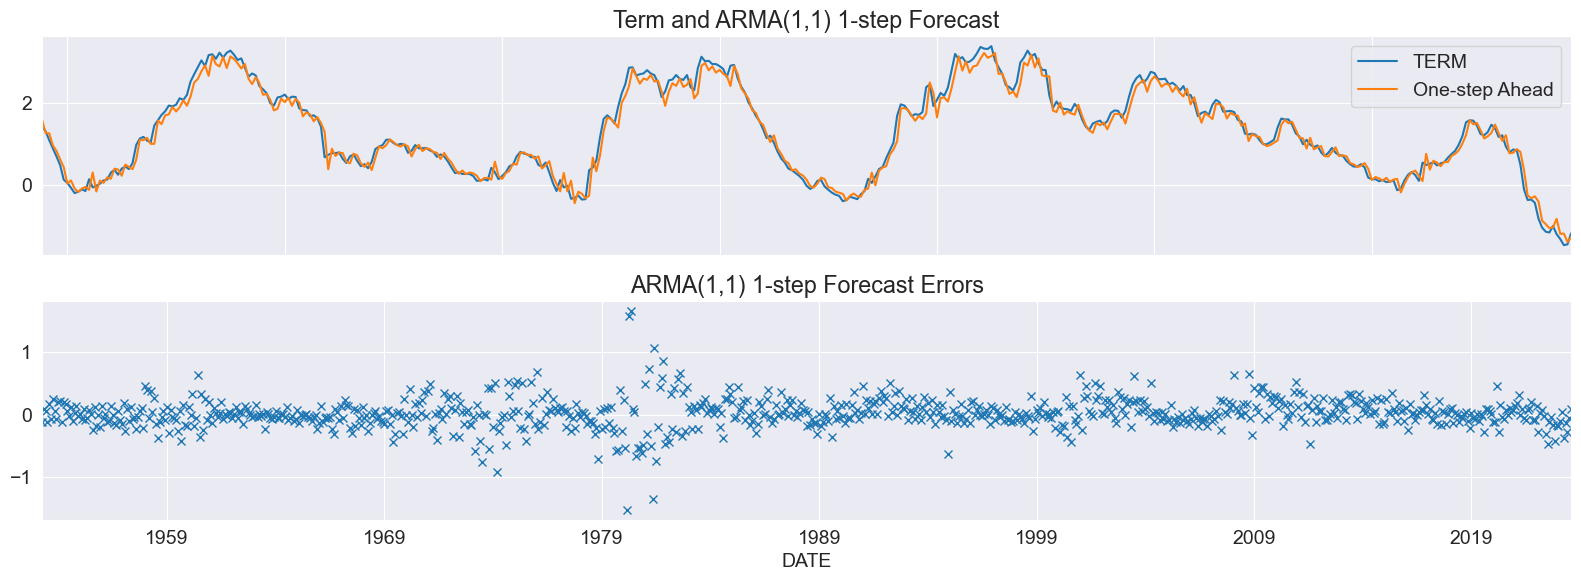

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.rc("figure", figsize=(16, 6))
plt.rc("font", size=14)

both = pd.concat([term, fcast], axis=1)
both.columns = ["TERM", "One-step Ahead"]
both_oos = both.iloc[half:]
fig, axes = plt.subplots(2, 1)
both_oos.plot.line(ax=axes[0])
axes[0].set_xticklabels([])
axes[0].set_xlabel("")
axes[0].set_title("Term and ARMA(1,1) 1-step Forecast")
errors = both.TERM - both["One-step Ahead"]
errors.plot.line(ax=axes[1], linestyle="none", marker="x")
axes[1].set_title("ARMA(1,1) 1-step Forecast Errors")
fig.tight_layout(pad=1.0)

In [5]:
import statsmodels.api as sm

oos_fcast = sm.add_constant(fcast.iloc[half:])
oos_fcast.columns = ["Const", "Forecast"]
res = sm.OLS(oos_errors, oos_fcast).fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     52.68
Date:                Thu, 28 Sep 2023   Prob (F-statistic):           1.91e-12
Time:                        13:33:16   Log-Likelihood:                 148.57
No. Observations:                 423   AIC:                            -293.1
Df Residuals:                     421   BIC:                            -285.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Const         -0.0291      0.013     -2.219      0.027      -0.055      -0.003
Forecast       0.0587      0.008      7.258      0.000       0.043       0.075
==============================================================================
Omnibus:                       24.121   Durbin-Watson:                   2.203
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.221
Skew:                           0.285   Prob(JB):                     2.77e-12
Kurtosis:                       4.642   Cond. No.                         3.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
import numpy as np

r_matrix = np.eye(2)
res.wald_test(r_matrix)

C:\Anaconda\envs\anaconda\Lib\site-packages\statsmodels\base\model.py:1906: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[40.71301765]]), p=6.850093904657588e-17, df_denom=421, df_num=2>

In [7]:
rw_forecast = term.shift(1)
both = pd.concat([term, rw_forecast], axis=1)
rw_error = term - rw_forecast
rw_oos_error = rw_error.iloc[half:]
rw_forecast = sm.add_constant(rw_forecast)
rw_forecast = rw_forecast.iloc[half:]
rw_forecast.columns = ["Const", "One-step RW Forecast"]
res = sm.OLS(rw_oos_error, rw_forecast).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   TERM   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8603
Date:                Thu, 28 Sep 2023   Prob (F-statistic):              0.354
Time:                        13:33:16   Log-Likelihood:                 127.11
No. Observations:                 423   AIC:                            -250.2
Df Residuals:                     421   BIC:                            -242.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Const                    0.0028      0.014      0.209      0.835      -0.024       0.030
One-step RW Forecast    -0.0074      0.008     -0.928      0.354      -0.023       0.008
==============================================================================
Omnibus:                       34.063   Durbin-Watson:                   1.370
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.196
Skew:                           0.358   Prob(JB):                     9.55e-21
Kurtosis:                       5.172   Cond. No.                         3.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
res.wald_test(r_matrix)

C:\Anaconda\envs\anaconda\Lib\site-packages\statsmodels\base\model.py:1906: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[0.73625766]]), p=0.4795183758828, df_denom=421, df_num=2>

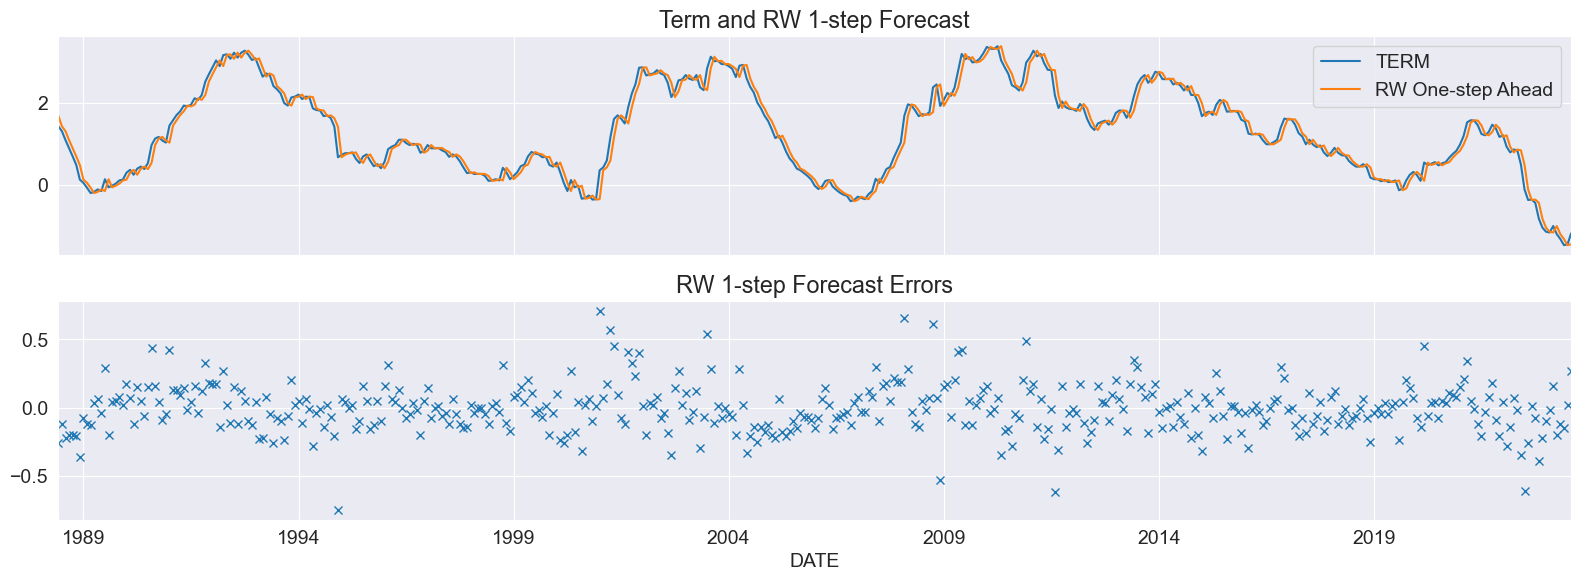

In [9]:
plt.rc("figure", figsize=(16, 6))

both.columns = ["TERM", "RW One-step Ahead"]
both_oos = both.iloc[half:]
fig, axes = plt.subplots(2, 1)
both_oos.plot.line(ax=axes[0])
axes[0].set_xticklabels([])
axes[0].set_xlabel("")
axes[0].set_title("Term and RW 1-step Forecast")

errors = rw_oos_error
errors.plot.line(ax=axes[1], linestyle="none", marker="x")
axes[1].set_title("RW 1-step Forecast Errors")
fig.tight_layout(pad=1.0)

### Exercise 71

Produce 3-step forecasts from the models selected in the previous exercises as well as a random walk model.

1. Compare these forecasts to the random walk models using MSE and MAE.


In [10]:
nobs = term.shape[0]
half = nobs // 2
mod = tsa.SARIMAX(term.iloc[:half], order=(1, 0, 1), trend="c")
res = mod.fit()
res.summary()

mod = tsa.statespace.SARIMAX(term, order=(1, 0, 1), trend="c")
forecast_res = mod.filter(res.params)

In [11]:
three_step = {}
for t in range(half, nobs):
    fcasts = forecast_res.predict(t, t + 2, dynamic=True)
    key = fcasts.index[-1]
    value = fcasts.iloc[-1]
    three_step[key] = value
three_step = pd.Series(three_step)

In [12]:
three_step_errors = term - three_step
three_step_errors = three_step_errors.dropna()
three_step_errors

1988-08-01   -0.323108
1988-09-01   -0.246349
1988-10-01   -0.441219
1988-11-01   -0.411333
1988-12-01   -0.661195
                ...   
2023-04-01   -0.463667
2023-05-01   -0.598025
2023-06-01   -0.917611
2023-07-01   -0.599572
2023-08-01   -0.334206
Length: 421, dtype: float64

In [13]:
three_step_rw = term.shift(3)
three_step_rw_errors = term - three_step_rw
three_step_rw_errors = three_step_rw_errors.iloc[half:]

In [14]:
errors = pd.DataFrame({"ARMA": three_step_errors, "RW": three_step_rw_errors}).dropna()
pd.DataFrame([(errors**2).mean(), errors.abs().mean()], index=["MSE", "MAE"])

,ARMA,RW
MSE,0.205157,0.140252
MAE,0.348047,0.287102


In [15]:
d = errors["ARMA"] ** 2 - errors["RW"] ** 2
x = np.ones_like(d)
maxlags = int(d.shape[0] ** (1 / 3))
res = sm.OLS(d, x).fit(cov_type="HAC", cov_kwds={"maxlags": maxlags})
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 28 Sep 2023   Prob (F-statistic):                nan
Time:                        13:33:18   Log-Likelihood:                 16.442
No. Observations:                 421   AIC:                            -30.88
Df Residuals:                     420   BIC:                            -26.84
Df Model:                           0                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0649      0.023      2.867      0.004       0.021       0.109
==============================================================================
Omnibus:                       86.887   Durbin-Watson:                   0.468
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.841
Skew:                           1.016   Prob(JB):                     4.97e-48
Kurtosis:                       5.880   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 7 lags and without small sample correction
"""

In [16]:
d = errors["ARMA"].abs() - errors["RW"].abs()
res = sm.OLS(d, x).fit(cov_type="HAC", cov_kwds={"maxlags": maxlags})
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 28 Sep 2023   Prob (F-statistic):                nan
Time:                        13:33:18   Log-Likelihood:                -22.305
No. Observations:                 421   AIC:                             46.61
Df Residuals:                     420   BIC:                             50.65
Df Model:                           0                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0609      0.024      2.513      0.012       0.013       0.108
==============================================================================
Omnibus:                        0.507   Durbin-Watson:                   0.547
Prob(Omnibus):                  0.776   Jarque-Bera (JB):                0.483
Skew:                           0.083   Prob(JB):                        0.786
Kurtosis:                       2.986   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 7 lags and without small sample correction
"""